In [1]:
## %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
import json
from flask import Flask, jsonify
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

# Part 1 - Prepare SQLAlchemy 

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)

measurement_df = pd.read_sql('SELECT * FROM measurement', conn)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [6]:
station_df = pd.read_sql('SELECT * FROM station', conn)
station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Part 2 - Exploratory Climate Analysis

In [7]:
# Calculate the date 1 year ago from the last data point in the database


measurement_df.sort_values("date", ascending= False)

,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0
...,...,...,...,...,...
14959,14960,USC00511918,2010-01-01,0.05,66.0
12187,12188,USC00519281,2010-01-01,0.15,70.0
9518,9519,USC00519523,2010-01-01,0.15,75.0
9007,9008,USC00518838,2010-01-01,0.21,72.0


In [8]:
lastyear_df = pd.read_sql('SELECT * FROM measurement WHERE date between "2016-08-23" and "2017-08-23"' , conn)
lastyear_df

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


In [9]:
# Perform a query to retrieve the date and precipitation scores
lastyear_prcp = lastyear_df[["date", "prcp"]]
lastyear_prcp

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [10]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
lastyear_prcp.set_index("date").sort_values("date",ascending=False)

,prcp
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00
...,...
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02


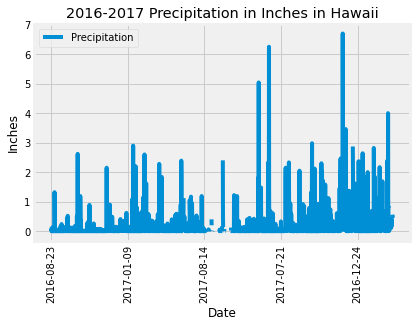

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
# gca stands for 'get current axis'
ax = plt.gca()

lastyear_prcp.plot(kind='line',x='date',y='prcp',ax=ax, rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("2016-2017 Precipitation in Inches in Hawaii")
plt.legend(["Precipitation"],loc="best")

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data

lastyear_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
station_df = pd.read_sql('SELECT station FROM station', conn)
station_df

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_df = pd.read_sql('SELECT count (*), station FROM measurement GROUP BY station ORDER BY count(*) desc', conn)
active_df
# List the stations and the counts in descending order.

,count (*),station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [15]:
#using pandas 
measurement_df["station"].value_counts() 

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# highest temperature
highest_df = pd.read_sql('SELECT max(tobs) FROM measurement WHERE station  = "USC00519281"', conn)
highest_df

,max(tobs)
0,85.0


In [17]:
#lowest temperature recorded
lowest_df = pd.read_sql('SELECT min(tobs) FROM measurement WHERE station  = "USC00519281"', conn)
lowest_df

,min(tobs)
0,54.0


In [18]:
# average temperature
average_df = pd.read_sql('SELECT avg(tobs) FROM measurement WHERE station  = "USC00519281"', conn)
average_df

,avg(tobs)
0,71.663781


In [19]:
# Choose the station with the highest number of temperature observations.
maxtemp_station = pd.read_sql('SELECT max(tobs),station FROM measurement', conn)

In [20]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastyear_tobs = pd.read_sql('SELECT tobs FROM measurement WHERE station  = "USC00519281" and date between "2016-08-23" and "2017-08-23"', conn)
lastyear_tobs

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


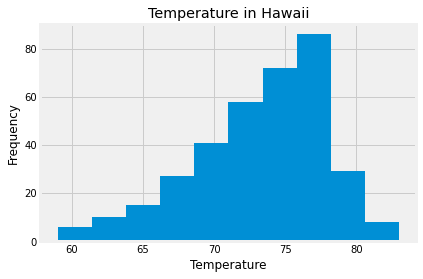

In [21]:
lastyear_tobs.hist()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature in Hawaii")
plt.show()

## Part 3 - Data Analysis Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return pd.read_sql('SELECT min(tobs),avg(tobs),max(tobs) FROM measurement WHERE date between "2012-02-28" and "2012-03-05"', conn)

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

   min(tobs)  avg(tobs)  max(tobs)
0       62.0  69.571429       74.0


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
    Returns:
        TMIN, TAVE, and TMAX
    """
    df = pd.read_sql('SELECT min(tobs),avg(tobs),max(tobs) FROM measurement WHERE date between "2016-08-23" and "2017-08-23"', conn)
    return df

In [27]:
# function usage example
print(df)

   min(tobs)  avg(tobs)  max(tobs)
0       58.0  74.590583       87.0


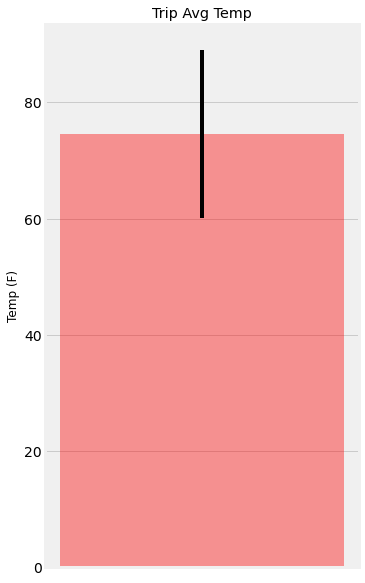

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmax = df["max(tobs)"]
tmin = df["min(tobs)"]
peak_to_peak = tmax - tmin # This will be our error line
tavg = df["avg(tobs)"] # This will be the height of our graph 
# Plot
fig, ax = plt.subplots(figsize = (5, 10)) # Create figure & axis objects 
ax.bar(x = 1, height = tavg, yerr = peak_to_peak/2, width = 0.2,color = 'r', alpha = 0.4) # Plotting
ax.set_xticks([0]) 
plt.yticks(size=14)
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.show()

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
#matching dates. 
# Sort this in descending order by precipitation amount and list the station, name, 
#latitude, longitude, and elevation

#joinging the two dataframe together 
rainfall_df = pd.read_sql('select s.name, m.station, m.prcp, s.elevation, s.latitude, s.longitude from (Select station\
, ROUND(sum(prcp),2) prcp from measurement where date between "2016-08-23" and "2017-08-23" group by station) m \
join station s on m.station=s.station order by m.prcp desc' , conn)
rainfall_df

,name,station,prcp,elevation,latitude,longitude
0,"MANOA LYON ARBO 785.2, HI US",USC00516128,147.81,152.4,21.33310,-157.80250
1,"WAIHEE 837.5, HI US",USC00519281,70.03,32.9,21.45167,-157.84889
2,"KANEOHE 838.1, HI US",USC00513117,48.51,14.6,21.42340,-157.80150
3,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,38.01,19.5,21.33556,-157.71139
4,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,33.24,7.0,21.52130,-157.83740
5,"WAIKIKI 717.2, HI US",USC00519397,16.09,3.0,21.27160,-157.81680
6,"PEARL CITY, HI US",USC00517948,4.59,11.9,21.39340,-157.97510


In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    Args:
        date (str): A date string in the format '%m-%d'
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    """
    query = f'''
        SELECT
            MIN(tobs) AS min_tobs,
            MAX(tobs) AS max_tobs,
            AVG(tobs) AS avg_tobs
        FROM
            measurement
        WHERE 
            date LIKE '%-{date}'
    '''
    day_temps_df = pd.read_sql(query, conn)
    day_temps = tuple(day_temps_df.values[0])
    return day_temps
daily_normals("01-01")

(62.0, 77.0, 69.15384615384616)

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Strip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

start_date = dt.datetime(2018,1,1)
end_date = dt.datetime(2018,1,7) 
date_list = pd.date_range(start_date, end_date).tolist()
date_list
dates=[]
for date in date_list:
    dates.append (dt.datetime.strftime(date, '%d-%m')) 
normals=[]
for date in dates:
    normals.append(daily_normals(date))
print("My Vacation Date: Jan 01 through Jan 07")
for normal in normals:
    print(normal)


My Vacation Date: Jan 01 through Jan 07
(62.0, 77.0, 69.15384615384616)
(56.0, 78.0, 68.14035087719299)
(64.0, 76.0, 70.0327868852459)
(60.0, 80.0, 71.87931034482759)
(65.0, 79.0, 72.75925925925925)
(64.0, 81.0, 74.6140350877193)
(67.0, 81.0, 74.77777777777777)


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normal_temp=[]
for normal in normals:
    normal_temp.append(np.ravel(normal))
travel_df = pd.DataFrame(normal_temp, columns=['min(tobs)', 'avg(tobs)', 'max(tobs)'])
travel_df.index=[str(date.strftime('%m-%d-%y')) for date in date_list]
travel_df

,min(tobs),avg(tobs),max(tobs)
01-01-18,62.0,77.0,69.153846
01-02-18,56.0,78.0,68.140351
01-03-18,64.0,76.0,70.032787
01-04-18,60.0,80.0,71.879310
01-05-18,65.0,79.0,72.759259
01-06-18,64.0,81.0,74.614035
01-07-18,67.0,81.0,74.777778


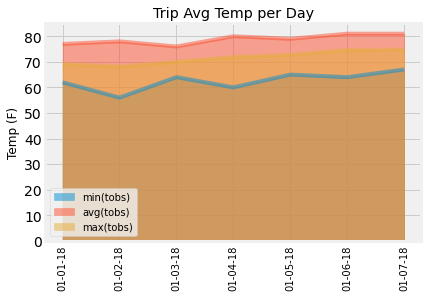

In [40]:
# Plot the daily normals as an area plot with `stacked=False`
ax = travel_df.plot.area(stacked=False, rot=90)
plt.yticks(size=14)
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp per Day")
plt.show()
